In [3]:
# Untuk analisis dan mengolah data
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# Untuk pembelajaran
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import neighbors
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
from sklearn.metrics import classification_report
# Untuk plot confussion matrix yang lebih baik
import itertools

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# Path menuju file dataset training
file_path = './tubes2_HeartDisease_train.csv'

# Header kolom
headers = ['age', 'sex', 'CTP', 'RBP','SC', 'FBS','rECG', 'MHR', 'EIA','STDI','PE_ST', 'n_MV','thal', 'diagnosis']

# Membaca dataset training
train_dataset = pd.read_csv(file_path, header=None, engine='python', skiprows=1, na_values='?', names=headers)
train_dataset.head(15)

,age,sex,CTP,RBP,SC,FBS,rECG,MHR,EIA,STDI,PE_ST,n_MV,thal,diagnosis
0,54,1,4,125.0,216.0,0.0,0.0,140.0,0.0,0.0,NaN,NaN,NaN,1
1,55,1,4,158.0,217.0,0.0,0.0,110.0,1.0,2.5,2.0,NaN,NaN,1
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,NaN,NaN,NaN,0
4,50,1,4,120.0,0.0,0.0,1.0,156.0,1.0,0.0,1.0,NaN,6.0,3
5,64,0,4,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
6,63,1,4,130.0,308.0,0.0,0.0,138.0,1.0,2.0,2.0,NaN,NaN,2
7,58,1,2,130.0,251.0,0.0,0.0,110.0,0.0,0.0,NaN,NaN,NaN,0
8,42,1,2,150.0,268.0,0.0,0.0,136.0,0.0,0.0,NaN,NaN,NaN,0
9,54,1,3,120.0,258.0,0.0,2.0,147.0,0.0,4.0,2.0,0.0,7.0,0


In [9]:
# Memisahkan dataset menjadi 2 kelompok
train_dataset_0 = train_dataset[train_dataset['diagnosis'] == 0].copy()
train_dataset_1 = train_dataset[train_dataset['diagnosis'] != 0].copy()

# Menyimpan nilai modus setiap atribut untuk kedua kelompok
dataset_0_modes = train_dataset_0.mode().iloc[0]
dataset_0_modes.name = 'mode'
dataset_1_modes = train_dataset_1.mode().iloc[0]
dataset_1_modes.name = 'mode'

# Menampilkan nilai modus setiap atribut untuk kedua kelompok
display(pd.Series.to_frame(dataset_0_modes))
display(pd.Series.to_frame(dataset_1_modes))

,age,sex,CTP,RBP,SC,FBS,rECG,MHR,EIA,STDI,PE_ST,n_MV,thal,diagnosis
0,54.0,1.0,2.0,120.0,0.0,0.0,0.0,140.0,0.0,0.0,1.0,0.0,3.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN


,mode
age,54.0
sex,1.0
CTP,2.0
RBP,120.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,140.0
EIA,0.0
STDI,0.0


,mode
age,61.0
sex,1.0
CTP,4.0
RBP,120.0
SC,0.0
FBS,0.0
rECG,0.0
MHR,120.0
EIA,1.0
STDI,0.0


In [4]:
# Mengisi nilai atribut yang tidak diketahui
train_dataset_0.fillna(dataset_0_modes, inplace=True)
train_dataset_1.fillna(dataset_1_modes, inplace=True)

# Menggabungkan kembali kedua kelompok
train_dataset = pd.concat([train_dataset_0, train_dataset_1])
train_dataset.head(15)

,age,sex,CTP,RBP,SC,FBS,rECG,MHR,EIA,STDI,PE_ST,n_MV,thal,diagnosis
2,54,0,3,135.0,304.0,1.0,0.0,170.0,0.0,0.0,1.0,0.0,3.0,0
3,48,0,3,120.0,195.0,0.0,0.0,125.0,0.0,0.0,1.0,0.0,3.0,0
5,64,0,4,130.0,303.0,0.0,0.0,122.0,0.0,2.0,2.0,2.0,3.0,0
7,58,1,2,130.0,251.0,0.0,0.0,110.0,0.0,0.0,1.0,0.0,3.0,0
8,42,1,2,150.0,268.0,0.0,0.0,136.0,0.0,0.0,1.0,0.0,3.0,0
9,54,1,3,120.0,258.0,0.0,2.0,147.0,0.0,4.0,2.0,0.0,7.0,0
13,55,0,2,132.0,342.0,0.0,0.0,166.0,0.0,12.0,1.0,0.0,3.0,0
21,45,0,2,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0
24,51,0,3,120.0,295.0,0.0,2.0,157.0,0.0,6.0,1.0,0.0,3.0,0
25,53,1,3,155.0,175.0,1.0,1.0,160.0,0.0,0.0,1.0,0.0,6.0,0


In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 2 to 778
Data columns (total 14 columns):
age          779 non-null int64
sex          779 non-null int64
CTP          779 non-null int64
RBP          779 non-null float64
SC           779 non-null float64
FBS          779 non-null float64
rECG         779 non-null float64
MHR          779 non-null float64
EIA          779 non-null float64
STDI         779 non-null float64
PE_ST        779 non-null float64
n_MV         779 non-null float64
thal         779 non-null float64
diagnosis    779 non-null int64
dtypes: float64(10), int64(4)
memory usage: 91.3 KB


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## Naive-Bayes

Mencoba melakukan eksekusi tanpa mengubah dataset

Fold 1
Confusion matrix:


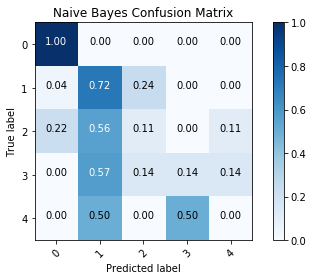


Prediction Performance Measurement

> Accuracy = 62.8%

Fold 2
Confusion matrix:


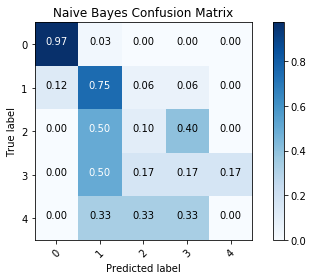


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 3
Confusion matrix:


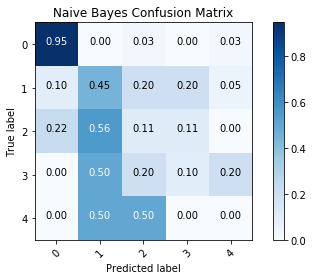


Prediction Performance Measurement

> Accuracy = 59%

Fold 4
Confusion matrix:


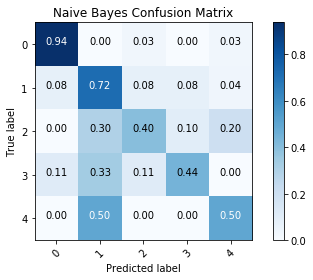


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 5
Confusion matrix:


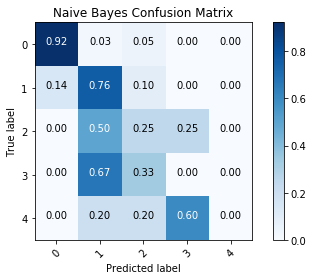


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 6
Confusion matrix:


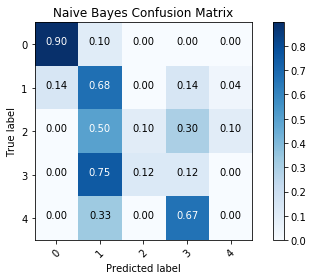


Prediction Performance Measurement

> Accuracy = 60.3%

Fold 7
Confusion matrix:


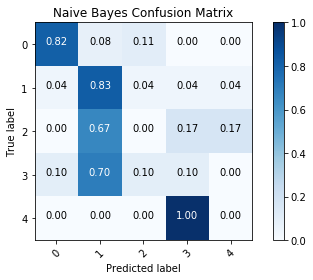


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 8
Confusion matrix:


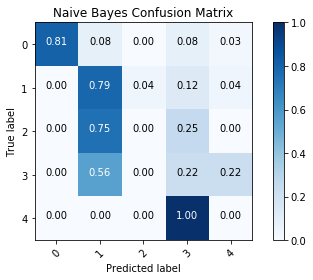


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 9
Confusion matrix:


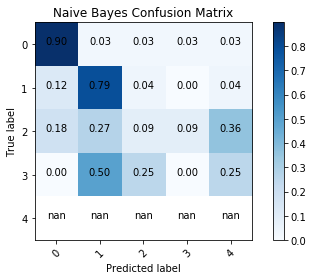


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 10
Confusion matrix:


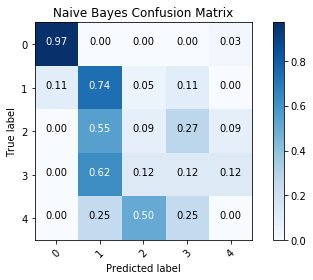


Prediction Performance Measurement

> Accuracy = 64.9%

Akurasi rata-rata: 0.6533966033966034


In [7]:
X, y = train_dataset.values[:, 0:13], train_dataset.values[:, 13]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

In [8]:
# Hitung Korelasi age
train_dataset['age'].corr(train_dataset['diagnosis'])

0.3550066873718207

In [9]:
# Hitung Korelasi sex
train_dataset['sex'].corr(train_dataset['diagnosis'])

0.2591122494555671

In [10]:
# Hitung Korelasi CTP
train_dataset['CTP'].corr(train_dataset['diagnosis'])

0.3878274369182739

In [11]:
# Hitung Korelasi RBP
train_dataset['RBP'].corr(train_dataset['diagnosis'])

0.09410467570984574

In [12]:
# Hitung Korelasi SC
train_dataset['SC'].corr(train_dataset['diagnosis'])

-0.20038983001347346

In [13]:
# Hitung Korelasi FBS
train_dataset['FBS'].corr(train_dataset['diagnosis'])

0.12959342746947913

In [14]:
# Hitung Korelasi rECG
train_dataset['rECG'].corr(train_dataset['diagnosis'])

0.14499388173393096

In [15]:
# Hitung Korelasi MHR
train_dataset['MHR'].corr(train_dataset['diagnosis'])

-0.37494434065708254

In [16]:
# Hitung Korelasi EIA
train_dataset['EIA'].corr(train_dataset['diagnosis'])

0.42327819745971607

In [17]:
# Hitung Korelasi STDI
train_dataset['STDI'].corr(train_dataset['diagnosis'])

0.20612379952765683

In [18]:
# Hitung Korelasi PE_ST
train_dataset['PE_ST'].corr(train_dataset['diagnosis'])

0.47844049064032834

In [19]:
# Hitung Korelasi n_MV
train_dataset['n_MV'].corr(train_dataset['diagnosis'])

0.5978826850215676

In [20]:
# Hitung Korelasi thal
train_dataset['thal'].corr(train_dataset['diagnosis'])

0.5909154344065817

Karena terdapat beberapa data seperti: **resting blood pressure, fasting blood sugar, resting ECG, ST depression induced by exercise relative to rest, serum cholestrol** yang korelasi terhadap diagnosis masih kurang dari **0.25** dan hanya nilai dari **resting blood pressure** yang kurang dari **0.1**, maka dapat kita drop terlebih dahulu yang kurang dari 0.1. 

In [21]:
del train_dataset['RBP']

Fold 1
Confusion matrix:


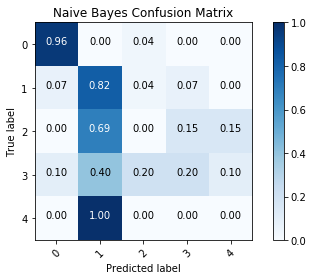


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 2
Confusion matrix:


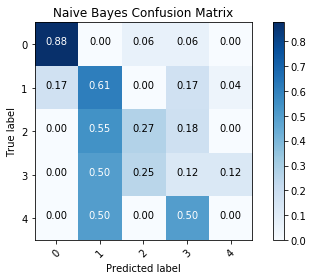


Prediction Performance Measurement

> Accuracy = 59%

Fold 3
Confusion matrix:


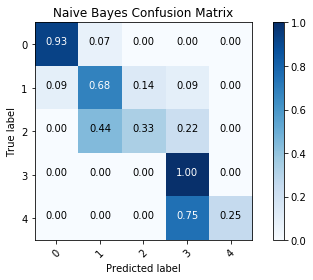


Prediction Performance Measurement

> Accuracy = 75.6%

Fold 4
Confusion matrix:


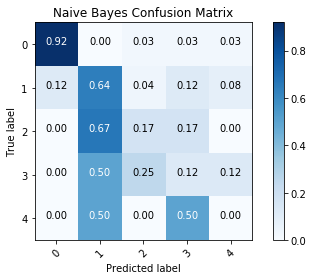


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 5
Confusion matrix:


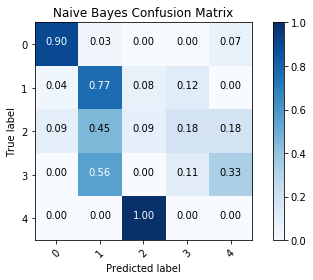


Prediction Performance Measurement

> Accuracy = 62.8%

Fold 6
Confusion matrix:


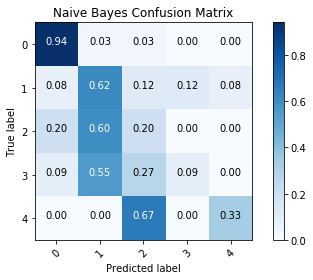


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 7
Confusion matrix:


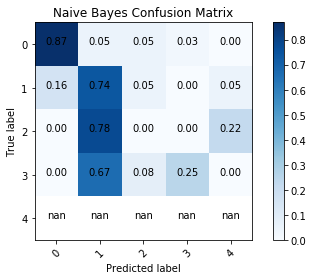


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 8
Confusion matrix:


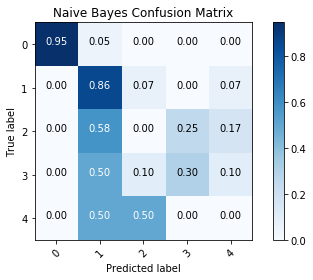


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 9
Confusion matrix:


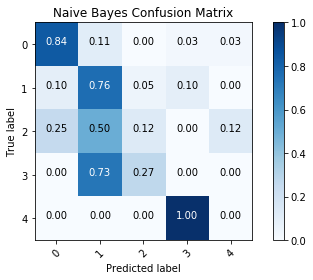


Prediction Performance Measurement

> Accuracy = 61.5%

Fold 10
Confusion matrix:


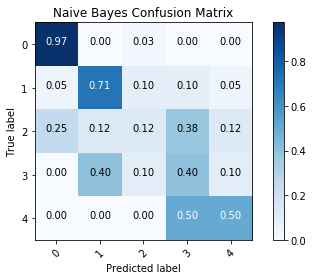


Prediction Performance Measurement

> Accuracy = 72.7%

Akurasi rata-rata: 0.6560606060606061


In [22]:
X, y = train_dataset.values[:, 0:12], train_dataset.values[:, 12]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

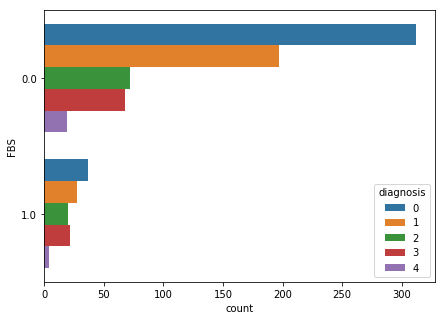

proportion (%)
FBS diagnosis                
0.0 0               46.706587
    1               29.491018
    2               10.778443
    3               10.179641
    4                2.844311
1.0 0               33.333333
    1               25.225225
    3               19.819820
    2               18.018018
    4                3.603604

In [23]:
# Menampilkan grafik distribusi
plt.figure(figsize = (7,5))
sns.countplot(y='FBS', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
fbs_group = train_dataset.groupby(['FBS'])
proportion = fbs_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

Karena plot perbedaan keduanya tidak terlalu signifkan antara yang mempunyai gula darah lebih dari 120mg/dL maupun yang tidak, maka sebaiknya tabel dari **fasting blood sugar > 120 mg/dl** dihapus karena tidak terlalu signifikan, juga mengingat korelasi yang kurang signifikan (kurang dari 0.2) maka akan dicoba untuk dihapus

In [24]:
del train_dataset['FBS']

Fold 1
Confusion matrix:


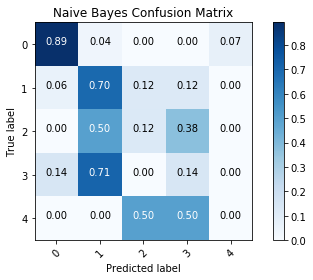


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 2
Confusion matrix:


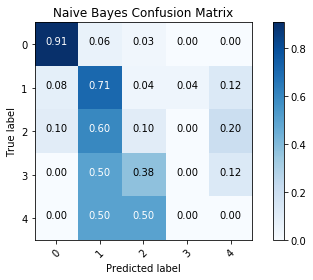


Prediction Performance Measurement

> Accuracy = 60.3%

Fold 3
Confusion matrix:


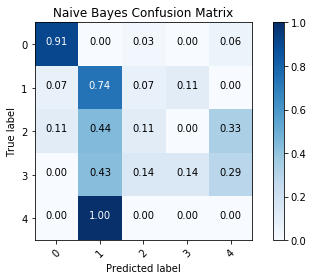


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 4
Confusion matrix:


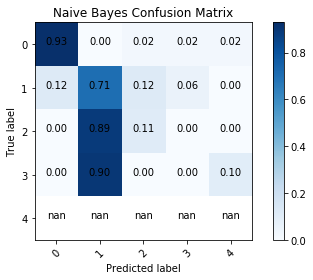


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 5
Confusion matrix:


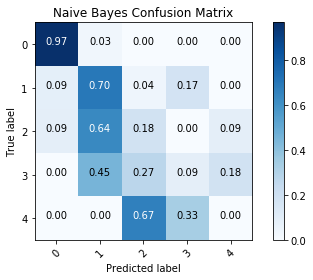


Prediction Performance Measurement

> Accuracy = 61.5%

Fold 6
Confusion matrix:


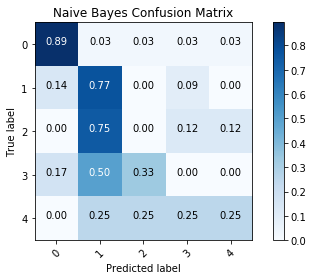


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 7
Confusion matrix:


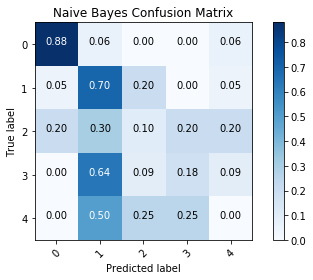


Prediction Performance Measurement

> Accuracy = 59%

Fold 8
Confusion matrix:


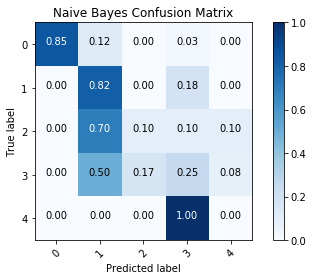


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 9
Confusion matrix:


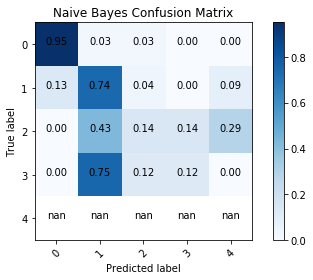


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 10
Confusion matrix:


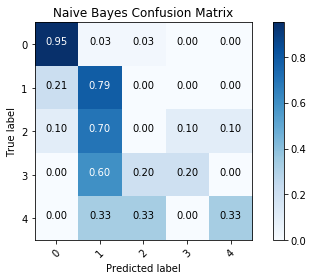


Prediction Performance Measurement

> Accuracy = 67.5%

Akurasi rata-rata: 0.6495837495837495


In [25]:
X, y = train_dataset.values[:, 0:11], train_dataset.values[:, 11]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

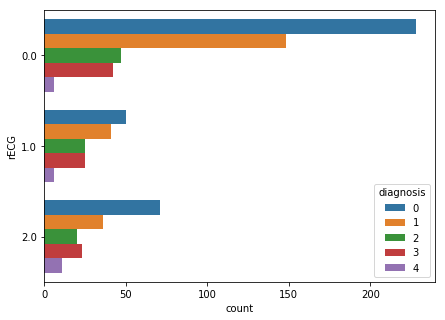

proportion (%)
rECG diagnosis                
0.0  0               48.407643
     1               31.422505
     2                9.978769
     3                8.917197
     4                1.273885
1.0  0               34.013605
     1               27.891156
     2               17.006803
     3               17.006803
     4                4.081633
2.0  0               44.099379
     1               22.360248
     3               14.285714
     2               12.422360
     4                6.832298

In [26]:
# Menampilkan grafik distribusi
plt.figure(figsize = (7,5))
sns.countplot(y='rECG', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
r_ECG_group = train_dataset.groupby(['rECG'])
proportion = r_ECG_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [27]:
del train_dataset['rECG']

Fold 1
Confusion matrix:


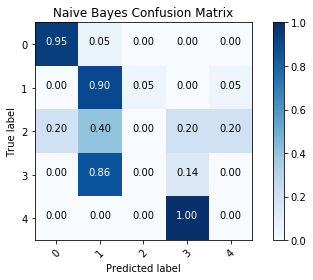


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 2
Confusion matrix:


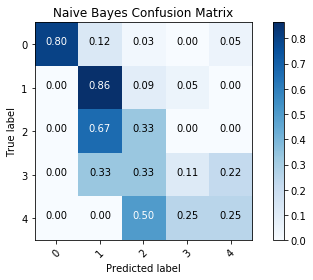


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 3
Confusion matrix:


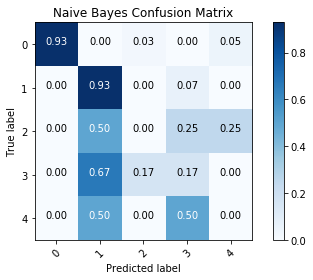


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 4
Confusion matrix:


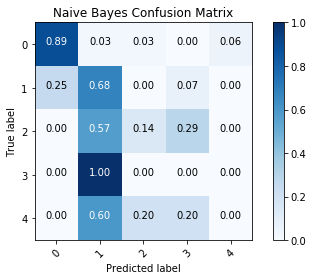


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 5
Confusion matrix:


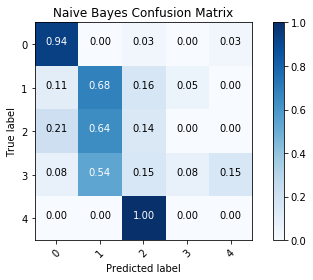


Prediction Performance Measurement

> Accuracy = 57.7%

Fold 6
Confusion matrix:


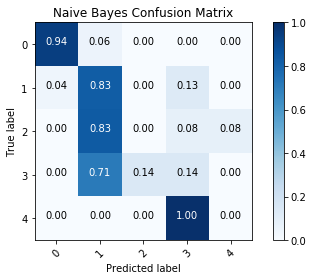


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 7
Confusion matrix:


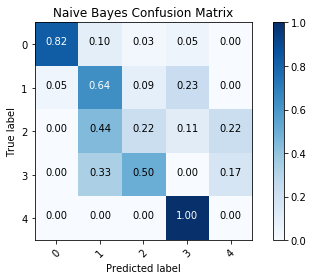


Prediction Performance Measurement

> Accuracy = 62.8%

Fold 8
Confusion matrix:


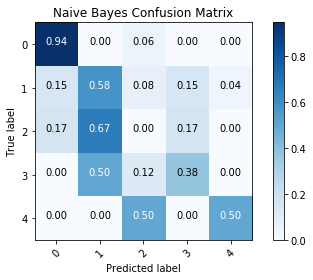


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 9
Confusion matrix:


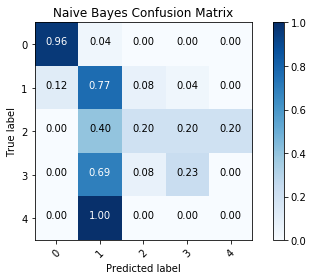


Prediction Performance Measurement

> Accuracy = 64.1%

Fold 10
Confusion matrix:


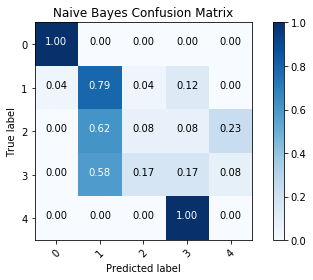


Prediction Performance Measurement

> Accuracy = 63.6%

Akurasi rata-rata: 0.6585081585081586


In [28]:
X, y = train_dataset.values[:, 0:10], train_dataset.values[:, 10]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

In [29]:
# Menampilkan tabel proporsi
STDI_group = train_dataset.groupby(['STDI'])
proportion = STDI_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

,,proportion (%)
STDI,diagnosis,
-2.6,1,100.000000
-2.0,2,100.000000
-1.5,1,100.000000
-1.1,0,100.000000
-1.0,2,100.000000
-0.9,1,100.000000
-0.8,1,100.000000
-0.7,2,100.000000
-0.5,1,100.000000


Karena distribusinya terlalu banyak dan tidak menggambarkan klasifikasi yang cukup jelas baik yang berpenyakit maupun yang tidak dan nilai dari koefisien korelasinya juga kurang dari **25%**, maka sebaiknya atribut **ST depression induced by exercise relative to rest** dihapuskan

In [30]:
del train_dataset['STDI']

Fold 1
Confusion matrix:


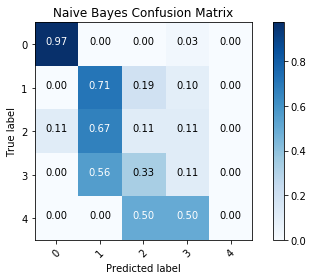


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 2
Confusion matrix:


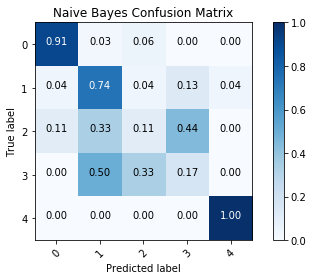


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 3
Confusion matrix:


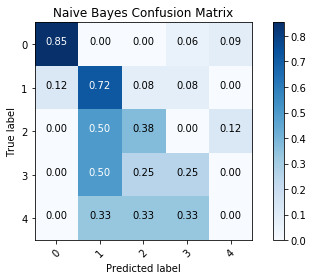


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 4
Confusion matrix:


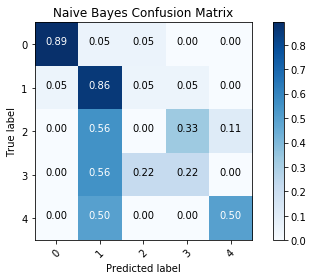


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 5
Confusion matrix:


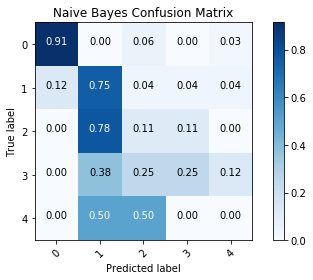


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 6
Confusion matrix:


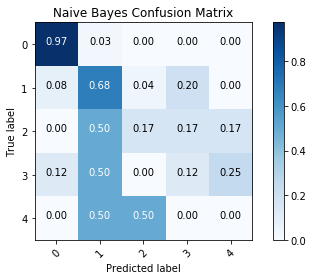


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 7
Confusion matrix:


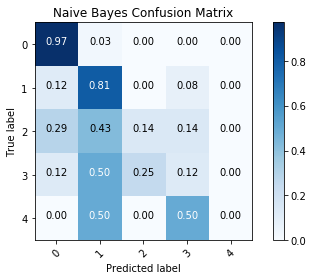


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 8
Confusion matrix:


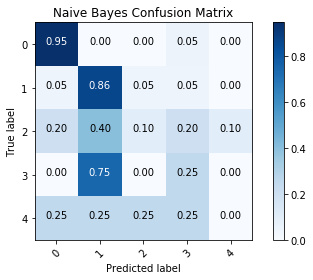


Prediction Performance Measurement

> Accuracy = 73.1%

Fold 9
Confusion matrix:


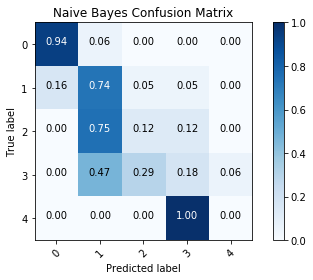


Prediction Performance Measurement

> Accuracy = 62.8%

Fold 10
Confusion matrix:


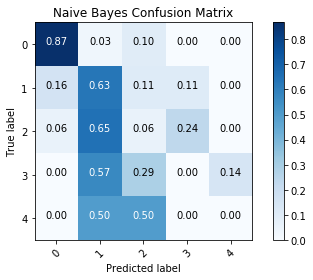


Prediction Performance Measurement

> Accuracy = 50.6%

Akurasi rata-rata: 0.6673160173160174


In [31]:
X, y = train_dataset.values[:, 0:9], train_dataset.values[:, 9]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

In [32]:
# Menampilkan tabel proporsi
SC_group = train_dataset.groupby(['SC'])
proportion = SC_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

proportion (%)
SC    diagnosis                
0.0   1               33.727811
      2               23.076923
      3               20.710059
      0               19.526627
      4                2.958580
85.0  0              100.000000
100.0 0               50.000000
      1               50.000000
117.0 1              100.000000
126.0 0              100.000000
129.0 0              100.000000
131.0 3              100.000000
132.0 0              100.000000
139.0 0              100.000000
141.0 0              100.000000
142.0 3              100.000000
149.0 0               50.000000
      1               50.000000
153.0 2              100.000000
156.0 1              100.000000
157.0 0              100.000000
160.0 0               80.000000
      1               20.000000
161.0 0              100.000000
163.0 0              100.000000
164.0 1               50.000000
      3               50.000000
166.0 0               50.000000
      4               50.000000
168.0 0              100.000000
...                         ...
338.0 1              100.000000
339.0 0              100.000000
340.0 0              100.000000
341.0 1               66.666667
      2               33.333333
342.0 1               66.666667
      0               33.333333
344.0 0              100.000000
347.0 0              100.000000
353.0 3              100.000000
354.0 0              100.000000
355.0 1              100.000000
358.0 0              100.000000
360.0 0              100.000000
365.0 0              100.000000
369.0 3              100.000000
384.0 2              100.000000
388.0 1              100.000000
392.0 1              100.000000
393.0 1              100.000000
394.0 0              100.000000
404.0 1              100.000000
407.0 4              100.000000
412.0 0              100.000000
417.0 0              100.000000
458.0 0              100.000000
466.0 1              100.000000
491.0 1              100.000000
518.0 1              100.000000
529.0 1              100.000000

[384 rows x 1 columns]

Karena distribusinya terlalu banyak dan tidak menggambarkan klasifikasi yang cukup jelas baik yang berpenyakit maupun yang tidak dan nilai dari koefisien korelasinya juga kurang dari **25%**, maka sebaiknya atribut **Serum Cholestrol** dihapuskan

In [33]:
del train_dataset['SC']

Fold 1
Confusion matrix:


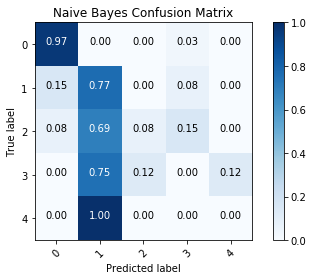


Prediction Performance Measurement

> Accuracy = 62.8%

Fold 2
Confusion matrix:


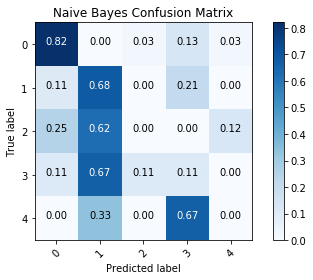


Prediction Performance Measurement

> Accuracy = 59%

Fold 3
Confusion matrix:


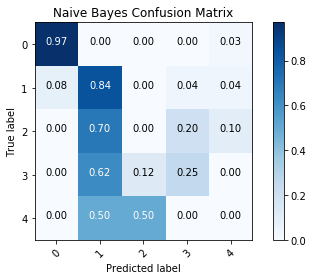


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 4
Confusion matrix:


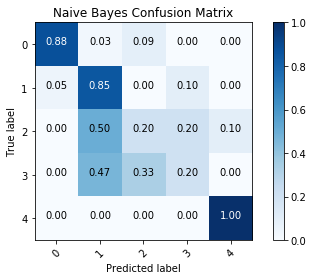


Prediction Performance Measurement

> Accuracy = 65.4%

Fold 5
Confusion matrix:


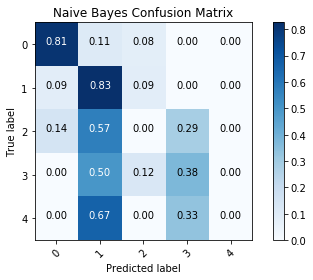


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 6
Confusion matrix:


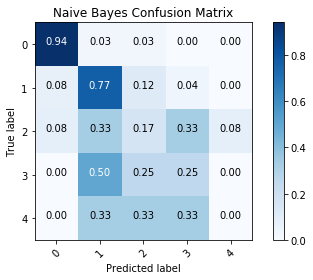


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 7
Confusion matrix:


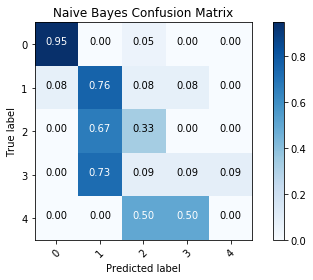


Prediction Performance Measurement

> Accuracy = 71.8%

Fold 8
Confusion matrix:


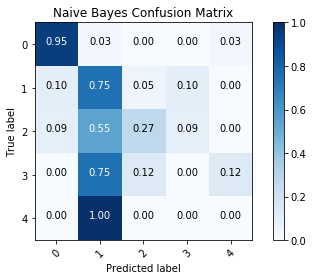


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 9
Confusion matrix:


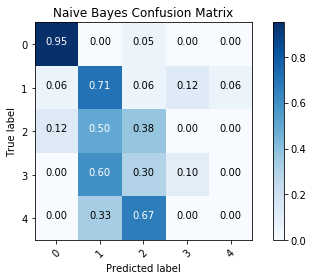


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 10
Confusion matrix:


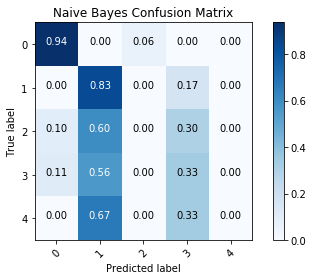


Prediction Performance Measurement

> Accuracy = 67.5%

Akurasi rata-rata: 0.6713786213786215


In [34]:
X, y = train_dataset.values[:, 0:8], train_dataset.values[:, 8]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

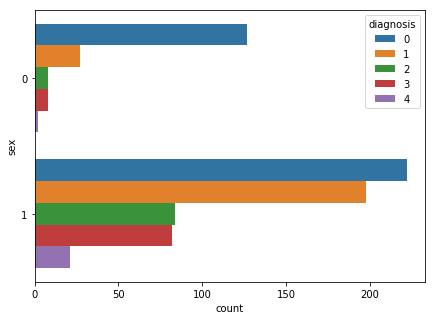

proportion (%)
sex diagnosis                
0   0               73.837209
    1               15.697674
    2                4.651163
    3                4.651163
    4                1.162791
1   0               36.573311
    1               32.619440
    2               13.838550
    3               13.509061
    4                3.459638

In [35]:
# Menampilkan grafik distribusi
plt.figure(figsize = (7,5))
sns.countplot(y='sex', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
sex_group = train_dataset.groupby(['sex'])
proportion = sex_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))

In [36]:
del train_dataset['sex']

Fold 1
Confusion matrix:


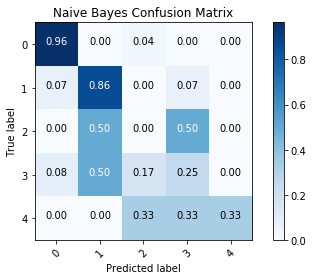


Prediction Performance Measurement

> Accuracy = 69.2%

Fold 2
Confusion matrix:


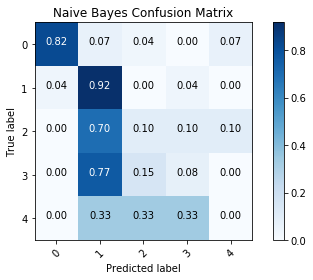


Prediction Performance Measurement

> Accuracy = 60.3%

Fold 3
Confusion matrix:


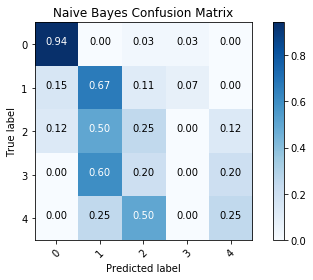


Prediction Performance Measurement

> Accuracy = 67.9%

Fold 4
Confusion matrix:


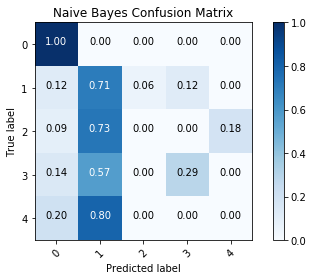


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 5
Confusion matrix:


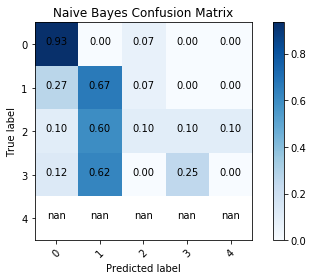


Prediction Performance Measurement

> Accuracy = 70.5%

Fold 6
Confusion matrix:


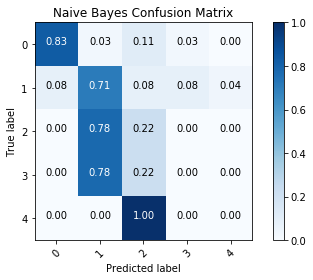


Prediction Performance Measurement

> Accuracy = 61.5%

Fold 7
Confusion matrix:


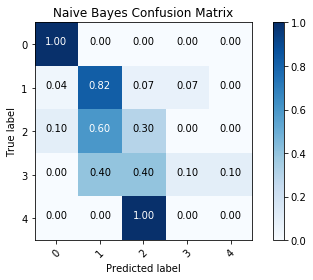


Prediction Performance Measurement

> Accuracy = 71.8%

Fold 8
Confusion matrix:


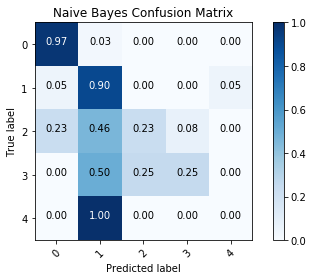


Prediction Performance Measurement

> Accuracy = 76.9%

Fold 9
Confusion matrix:


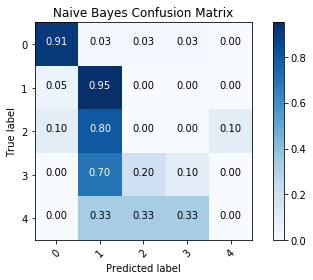


Prediction Performance Measurement

> Accuracy = 66.7%

Fold 10
Confusion matrix:


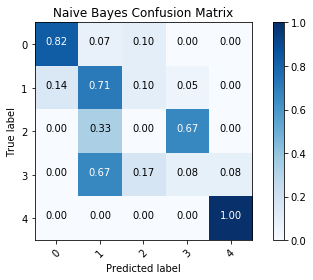


Prediction Performance Measurement

> Accuracy = 64.9%

Akurasi rata-rata: 0.6764735264735264


In [37]:
X, y = train_dataset.values[:, 0:7], train_dataset.values[:, 7]
kf = KFold(n_splits=10, shuffle=True)
gnb = GaussianNB()
i = 1
sum = 0
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gnb = gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    print('Fold ' + str(i))
    print('Confusion matrix:')
    NB_confusion_matrix = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])
    plot_confusion_matrix(NB_confusion_matrix, classes=[0,1,2,3,4], normalize=True,title='Naive Bayes Confusion Matrix')
    plt.show()
    print()
    correct_predictions = NB_confusion_matrix[0][0] + NB_confusion_matrix[1][1] + NB_confusion_matrix[2][2] + NB_confusion_matrix[3][3] + NB_confusion_matrix[4][4]
    predicted_instances = len(y_pred)
    true_positive = NB_confusion_matrix[0][0]
    accuracy = float(correct_predictions) / float(predicted_instances)
    print("Prediction Performance Measurement")
    print("")
    print("> Accuracy = " + str('%.3g'%(accuracy * 100)) + "%")
    print("")
    sum += accuracy
    i+=1
print('Akurasi rata-rata:', str(sum/10))

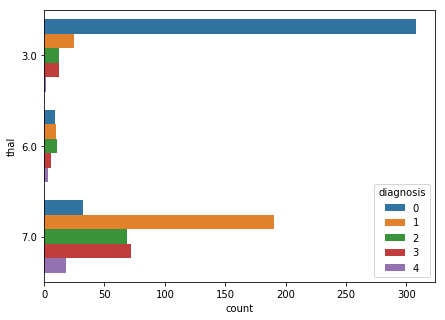

proportion (%)
thal diagnosis                
3.0  0               85.793872
     1                6.963788
     2                3.342618
     3                3.342618
     4                0.557103
6.0  2               28.205128
     1               25.641026
     0               23.076923
     3               15.384615
     4                7.692308
7.0  1               49.868766
     3               18.897638
     2               18.110236
     0                8.398950
     4                4.724409

In [38]:
# Menampilkan grafik distribusi
plt.figure(figsize = (7,5))
sns.countplot(y='thal', hue='diagnosis', data=train_dataset)
plt.show()

# Menampilkan tabel proporsi
thal_group = train_dataset.groupby(['thal'])
proportion = thal_group.diagnosis.value_counts(normalize=True) * 100
proportion.name = 'proportion (%)'
display(pd.Series.to_frame(proportion))